[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Qiuyi-Hong/Pre-Interview-Task-Newcastle/blob/main/analysisScenario2.ipynb)

In [1]:
# Install necessary packages: 
# !pip install pyomo pandas openpyxl matplotlib jupyter

# Install cbc solver: 
# !sudo apt-get install  coinor-cbc coinor-libcbc-dev 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from datetime import datetime, timedelta
%matplotlib inline
import pyomo.environ as pyo
from scenario2 import model 

In [3]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,Demand (kW),Unnamed: 2,Unnamed: 3,Solar Generation (kW),Unnamed: 5,Unnamed: 6,Electricity Price (p/kWh),Unnamed: 8
0,NaN,H1,H2,H3,H1,H2,H3,Import,Export
1,00:00:00,0.452,0.5,0.188,0,0,0,10.3425,3.86
2,00:30,0.32,0.352,0.092,0,0,0,10.5735,3.82
3,01:00,0.372,0.36,0.184,0,0,0,10.668,3.82
4,01:30,0.208,0.232,0.084,0,0,0,10.185,3.82


In [4]:
T = 48
H = 3
delta_t = 0.5
demand_h1 = data.iloc[1:, 1] # demand for house 1
demand_h2 = data.iloc[1:, 2] # demand for house 2
demand_h3 = data.iloc[1:, 3] # demand for house 3 

pv_h1 = data.iloc[1:, 4] # pv for house 1
pv_h2 = data.iloc[1:, 5] # pv for house 2
pv_h3 = data.iloc[1:, 6] # pv for house 3

ele_import_price = data.iloc[1:, 7] # electricity import price
ele_export_price = data.iloc[1:, 8] # electricity export price

In [5]:
result = model.create_instance("houses.dat", namespace="base")

In [6]:
for t in range(1,T+1):
    result.d._data[1, t].value = demand_h1[t]
    result.q_pv._data[1, t].value = pv_h1[t]
    result.pi_import._data[t].value = ele_import_price[t]
    result.pi_export._data[t].value = ele_export_price[t]
    
    result.d._data[2, t].value = demand_h2[t]
    result.q_pv._data[2, t].value = pv_h2[t]
    
    result.d._data[3, t].value = demand_h3[t]
    result.q_pv._data[3, t].value = pv_h3[t]   

In [7]:
solver = pyo.SolverFactory('cbc', executable='/usr/bin/cbc')
solver.solve(result)

{'Problem': [{'Name': 'unknown', 'Lower bound': 240.50493189, 'Upper bound': 240.50493189, 'Number of objectives': 1, 'Number of constraints': 1200, 'Number of variables': 1581, 'Number of binary variables': 576, 'Number of integer variables': 576, 'Number of nonzeros': 576, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 0.03, 'Wallclock time': 0.04, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}, 'Black box': {'Number of iterations': 0}}, 'Error rc': 0, 'Time': 0.04352140426635742}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

# Visualisation

In [8]:
p_c_h1 = [result.p_c._data[1, t].value for t in range(1,T+1)]
p_d_h1 = [result.p_d._data[1, t].value for t in range(1,T+1)]
E_h1 = [result.E._data[1, t].value for t in range(1,T+1)]
q_import_h1 = [result.q_import._data[1, t].value for t in range(1,T+1)]
q_export_h1 = [result.q_export._data[1, t].value for t in range(1,T+1)]
d_h1 = [result.d._data[1, t].value for t in range(1,T+1)]
q_pv_h1 = [result.q_pv._data[1, t].value for t in range(1,T+1)]
q_buy_h1 = [result.q_buy._data[1, t].value for t in range(1,T+1)]
q_sell_h1 = [result.q_sell._data[1, t].value for t in range(1,T+1)]

p_c_h2 = [result.p_c._data[2, t].value for t in range(1,T+1)]
p_d_h2 = [result.p_d._data[2, t].value for t in range(1,T+1)]
E_h2 = [result.E._data[2, t].value for t in range(1,T+1)]
q_import_h2 = [result.q_import._data[2, t].value for t in range(1,T+1)]
q_export_h2 = [result.q_export._data[2, t].value for t in range(1,T+1)]
d_h2 = [result.d._data[2, t].value for t in range(1,T+1)]
q_pv_h2 = [result.q_pv._data[2, t].value for t in range(1,T+1)]
q_buy_h2 = [result.q_buy._data[2, t].value for t in range(1,T+1)]
q_sell_h2 = [result.q_sell._data[2, t].value for t in range(1,T+1)]

p_c_h3 = [result.p_c._data[3, t].value for t in range(1,T+1)]
p_d_h3 = [result.p_d._data[3, t].value for t in range(1,T+1)]
E_h3 = [result.E._data[3, t].value for t in range(1,T+1)]
q_import_h3 = [result.q_import._data[3, t].value for t in range(1,T+1)]
q_export_h3 = [result.q_export._data[3, t].value for t in range(1,T+1)]
d_h3 = [result.d._data[3, t].value for t in range(1,T+1)]
q_pv_h3 = [result.q_pv._data[3, t].value for t in range(1,T+1)]
q_buy_h3 = [result.q_buy._data[3, t].value for t in range(1,T+1)]
q_sell_h3 = [result.q_sell._data[3, t].value for t in range(1,T+1)]

In [9]:
# Extract the Lagrange multipliers for the P2P market constraints
P2P_MCP = []
for t in range(1,T+1):
    P2P_MCP.append(abs(result.dual[result.constr16[t]]))
print(f"Lagrange Multipliers for the P2P market constraints: {P2P_MCP}")

Lagrange Multipliers for the P2P market constraints: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0565, 9.744, 12.348, 9.744, 9.744, 9.744, 12.1275, 9.744, 9.744, 9.744, 9.744, 10.8045, 9.744, 10.584, 10.584, 10.143, 9.9225, 9.975, 13.146914, 13.146914, 13.146914, 13.146914, 13.146914, 13.146914, 13.146914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## House 1

In [10]:
for t in range(1,T+1):
    print(f"t={t}, p_c={result.p_c._data[1, t].value}, p_d={result.p_d._data[1, t].value}, q_import={result.q_import._data[1, t].value}, q_export={result.q_export._data[1, t].value}, E={result.E._data[1, t].value}, d={result.d._data[1, t].value}, q_pv={result.q_pv._data[1, t].value}, q_buy={result.q_buy._data[1, t].value}, q_sell={result.q_sell._data[1, t].value}")

t=1, p_c=0.0, p_d=0.0, q_import=0.226, q_export=0.0, E=1.999, d=0.452, q_pv=0, q_buy=0.0, q_sell=0.0
t=2, p_c=0.0, p_d=0.0, q_import=0.16, q_export=0.0, E=1.998, d=0.32, q_pv=0, q_buy=0.0, q_sell=0.0
t=3, p_c=0.0, p_d=0.0, q_import=0.186, q_export=0.0, E=1.997, d=0.372, q_pv=0, q_buy=0.0, q_sell=0.0
t=4, p_c=0.0, p_d=0.0, q_import=0.104, q_export=0.0, E=1.996, d=0.208, q_pv=0, q_buy=0.0, q_sell=0.0
t=5, p_c=0.0, p_d=0.0, q_import=0.15, q_export=0.0, E=1.995, d=0.3, q_pv=0, q_buy=0.0, q_sell=0.0
t=6, p_c=0.0, p_d=0.0, q_import=0.188, q_export=0.0, E=1.994, d=0.376, q_pv=0, q_buy=0.0, q_sell=0.0
t=7, p_c=0.0, p_d=0.0, q_import=0.104, q_export=0.0, E=1.993, d=0.208, q_pv=0, q_buy=0.0, q_sell=0.0
t=8, p_c=0.0, p_d=0.0, q_import=0.138, q_export=0.0, E=1.992, d=0.276, q_pv=0, q_buy=0.0, q_sell=0.0
t=9, p_c=0.0, p_d=0.0, q_import=0.154, q_export=0.0, E=1.991, d=0.308, q_pv=0, q_buy=0.0, q_sell=0.0
t=10, p_c=0.0, p_d=0.0, q_import=0.068, q_export=0.0, E=1.99, d=0.136, q_pv=0, q_buy=0.0, q_sell

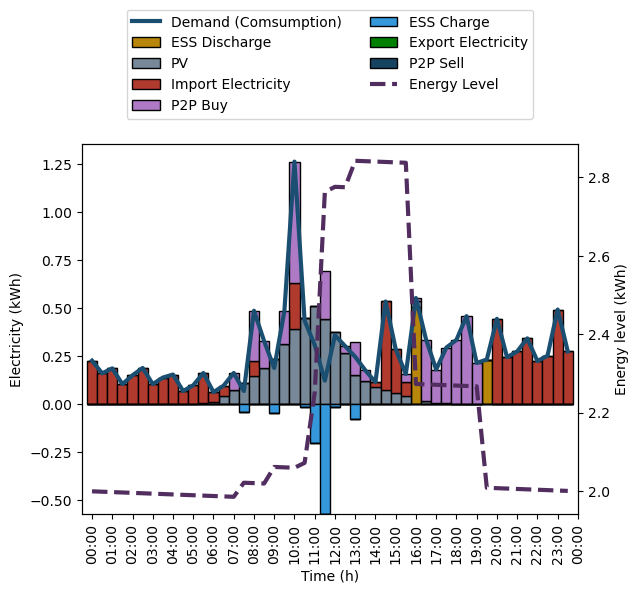

In [11]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h1)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h1)*delta_t, width=bar_width, label="ESS Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h1)*delta_t, bottom=np.array(p_d_h1)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h1), bottom=np.array(q_pv_h1)*delta_t + np.array(p_d_h1)*delta_t, width=bar_width, align='center', label="Import Electricity", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.array(q_buy_h1), bottom=np.array(q_import_h1) + np.array(q_pv_h1)*delta_t + np.array(p_d_h1)*delta_t, width=bar_width, align='center', label="P2P Buy ", color="#AF7AC5", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h1)*delta_t, width=bar_width, label="ESS Charge", color="#3498DB", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h1), bottom=np.negative(p_c_h1)*delta_t, width=bar_width, label="Export Electricity", color="#008000", edgecolor="black")

ax1.bar(time_range, np.negative(q_sell_h1), bottom=np.negative(q_export_h1) + np.negative(p_c_h1)*delta_t, width=bar_width, label="P2P Sell", color="#154360", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h1), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("houses_1.pdf", bbox_inches='tight')
plt.show()

## House 2

In [12]:
for t in range(1,T+1):
    print(f"t={t}, p_c={result.p_c._data[2, t].value}, p_d={result.p_d._data[2, t].value}, q_import={result.q_import._data[2, t].value}, q_export={result.q_export._data[2, t].value}, E={result.E._data[2, t].value}, d={result.d._data[2, t].value}, q_pv={result.q_pv._data[2, t].value}, q_buy={result.q_buy._data[2, t].value}, q_sell={result.q_sell._data[2, t].value}")

t=1, p_c=0.0, p_d=0.0, q_import=0.25, q_export=0.0, E=2.999, d=0.5, q_pv=0, q_buy=0.0, q_sell=0.0
t=2, p_c=0.0, p_d=0.0, q_import=0.176, q_export=0.0, E=2.998, d=0.352, q_pv=0, q_buy=0.0, q_sell=0.0
t=3, p_c=0.0, p_d=0.0, q_import=0.18, q_export=0.0, E=2.997, d=0.36, q_pv=0, q_buy=0.0, q_sell=0.0
t=4, p_c=0.0, p_d=0.0, q_import=0.116, q_export=0.0, E=2.996, d=0.232, q_pv=0, q_buy=0.0, q_sell=0.0
t=5, p_c=0.0, p_d=0.0, q_import=0.196, q_export=0.0, E=2.995, d=0.392, q_pv=0, q_buy=0.0, q_sell=0.0
t=6, p_c=0.0, p_d=0.0, q_import=0.274, q_export=0.0, E=2.994, d=0.548, q_pv=0, q_buy=0.0, q_sell=0.0
t=7, p_c=0.0, p_d=0.0, q_import=0.094, q_export=0.0, E=2.993, d=0.188, q_pv=0, q_buy=0.0, q_sell=0.0
t=8, p_c=0.0, p_d=0.0, q_import=0.176, q_export=0.0, E=2.992, d=0.352, q_pv=0, q_buy=0.0, q_sell=0.0
t=9, p_c=0.0, p_d=0.0, q_import=0.11, q_export=0.0, E=2.991, d=0.22, q_pv=0, q_buy=0.0, q_sell=0.0
t=10, p_c=0.0, p_d=0.0, q_import=0.508, q_export=0.0, E=2.99, d=1.016, q_pv=0, q_buy=0.0, q_sell=0

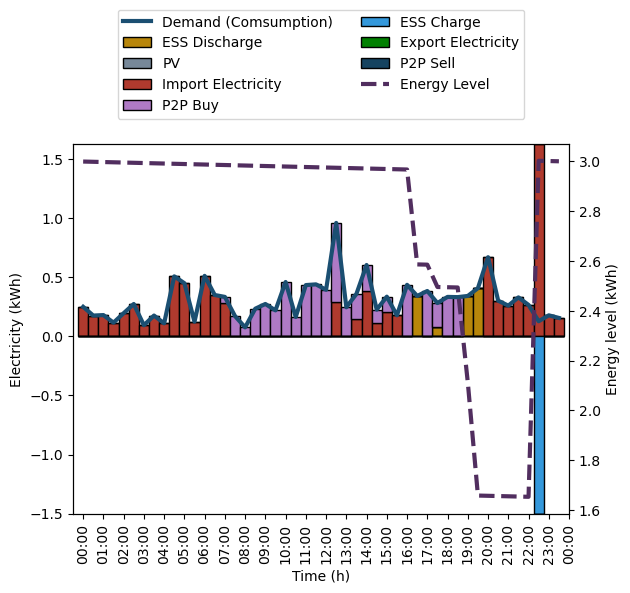

In [13]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h2)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h2)*delta_t, width=bar_width, label="ESS Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h2)*delta_t, bottom=np.array(p_d_h2)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h2), bottom=np.array(q_pv_h2)*delta_t + np.array(p_d_h2)*delta_t, width=bar_width, align='center', label="Import Electricity", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.array(q_buy_h2), bottom=np.array(q_import_h2) + np.array(q_pv_h2)*delta_t + np.array(p_d_h2)*delta_t, width=bar_width, align='center', label="P2P Buy ", color="#AF7AC5", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h2)*delta_t, width=bar_width, label="ESS Charge", color="#3498DB", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h2), bottom=np.negative(p_c_h2)*delta_t, width=bar_width, label="Export Electricity", color="#008000", edgecolor="black")

ax1.bar(time_range, np.negative(q_sell_h2), bottom=np.negative(q_export_h2) + np.negative(p_c_h2)*delta_t, width=bar_width, label="P2P Sell", color="#154360", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h2), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("houses_2.pdf", bbox_inches='tight')
plt.show()

## House 3

In [14]:
for t in range(1,T+1):
    print(f"t={t}, p_c={result.p_c._data[3, t].value}, p_d={result.p_d._data[3, t].value}, q_import={result.q_import._data[3, t].value}, q_export={result.q_export._data[3, t].value}, E={result.E._data[3, t].value}, d={result.d._data[3, t].value}, q_pv={result.q_pv._data[3, t].value}, q_buy={result.q_buy._data[3, t].value}, q_sell={result.q_sell._data[3, t].value}")

t=1, p_c=0.0, p_d=0.0, q_import=0.094, q_export=0.0, E=3.999, d=0.188, q_pv=0, q_buy=0.0, q_sell=0.0
t=2, p_c=0.0, p_d=0.0, q_import=0.046, q_export=0.0, E=3.998, d=0.092, q_pv=0, q_buy=0.0, q_sell=0.0
t=3, p_c=0.0, p_d=0.0, q_import=0.092, q_export=0.0, E=3.997, d=0.184, q_pv=0, q_buy=0.0, q_sell=0.0
t=4, p_c=0.0, p_d=0.0, q_import=0.042, q_export=0.0, E=3.996, d=0.084, q_pv=0, q_buy=0.0, q_sell=0.0
t=5, p_c=0.0, p_d=0.0, q_import=0.094, q_export=0.0, E=3.995, d=0.188, q_pv=0, q_buy=0.0, q_sell=0.0
t=6, p_c=0.0, p_d=0.0, q_import=0.046, q_export=0.0, E=3.994, d=0.092, q_pv=0, q_buy=0.0, q_sell=0.0
t=7, p_c=0.0, p_d=0.0, q_import=0.092, q_export=0.0, E=3.993, d=0.184, q_pv=0, q_buy=0.0, q_sell=0.0
t=8, p_c=0.0, p_d=0.0, q_import=0.042, q_export=0.0, E=3.992, d=0.084, q_pv=0, q_buy=0.0, q_sell=0.0
t=9, p_c=0.0, p_d=0.0, q_import=0.1, q_export=0.0, E=3.991, d=0.2, q_pv=0, q_buy=0.0, q_sell=0.0
t=10, p_c=0.0, p_d=0.0, q_import=0.042, q_export=0.0, E=3.99, d=0.084, q_pv=0, q_buy=0.0, q_sel

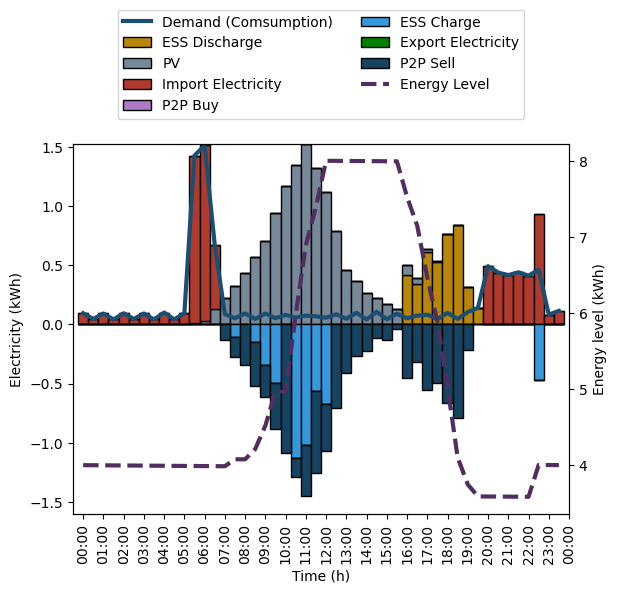

In [15]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h3)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h3)*delta_t, width=bar_width, label="ESS Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h3)*delta_t, bottom=np.array(p_d_h3)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h3), bottom=np.array(q_pv_h3)*delta_t + np.array(p_d_h3)*delta_t, width=bar_width, align='center', label="Import Electricity", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.array(q_buy_h3), bottom=np.array(q_import_h3) + np.array(q_pv_h3)*delta_t + np.array(p_d_h3)*delta_t, width=bar_width, align='center', label="P2P Buy ", color="#AF7AC5", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h3)*delta_t, width=bar_width, label="ESS Charge", color="#3498DB", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h3), bottom=np.negative(p_c_h3)*delta_t, width=bar_width, label="Export Electricity", color="#008000", edgecolor="black")

ax1.bar(time_range, np.negative(q_sell_h3), bottom=np.negative(q_export_h3) + np.negative(p_c_h3)*delta_t, width=bar_width, label="P2P Sell", color="#154360", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h3), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("houses_3.pdf", bbox_inches='tight')
plt.show()

# Energy Cost

In [16]:
# Objective function value for House 1
obj1 = 0 
for t in range(1,T+1):
    obj1 += result.pi_import._data[t].value*result.q_import._data[1, t].value - result.pi_export._data[t].value*result.q_export._data[1, t].value + result.c[1] * (result.p_c._data[1, t].value + result.p_d._data[1, t].value) * result.delta_t + (result.q_buy._data[1, t].value - result.q_sell._data[1, t].value) * P2P_MCP[t-1]
print(obj1)

# Objective function value for House 2
obj2 = 0
for t in range(1,T+1):
    obj2 += result.pi_import._data[t].value*result.q_import._data[2, t].value - result.pi_export._data[t].value*result.q_export._data[2, t].value + result.c[2] * (result.p_c._data[2, t].value + result.p_d._data[2, t].value) * result.delta_t + (result.q_buy._data[2, t].value - result.q_sell._data[2, t].value) * P2P_MCP[t-1]
print(obj2)

# Objective function value for House 3
obj3 = 0
for t in range(1,T+1):
    obj3 += result.pi_import._data[t].value*result.q_import._data[3, t].value - result.pi_export._data[t].value*result.q_export._data[3, t].value + result.c[3] * (result.p_c._data[3, t].value + result.p_d._data[3, t].value) * result.delta_t + (result.q_buy._data[3, t].value - result.q_sell._data[3, t].value) * P2P_MCP[t-1]
print(obj3)

103.20483877720001
163.8733942148
-26.57330114614002


In [17]:
obj1 + obj2 + obj3

240.50493184585997

# Electricity Import, Export and P2P Market Clearing Prices

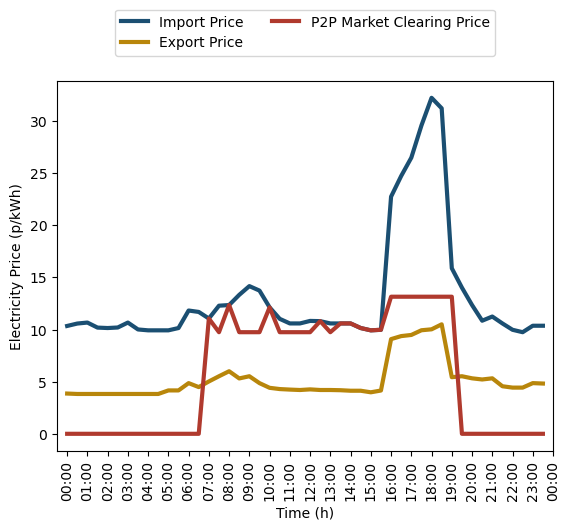

In [18]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(ele_import_price), label="Import Price", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)
ax1.plot(time_range, np.array(ele_export_price), label="Export Price", color="#B8860B", linestyle=lineStyle[0], linewidth=3)
ax1.plot(time_range, np.array(P2P_MCP), label="P2P Market Clearing Price", color="#B03A2E", linestyle=lineStyle[0], linewidth=3)

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity Price (p/kWh)")

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()

# Create a single legend
ax1.legend(handles1, labels1, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("electricity_prices.pdf", bbox_inches='tight')
plt.show()